In [1]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score as NMI
from predecon import PreDeCon

from IPython.display import Image
import os

base_path_testing = os.path.join('..', 'data')

#### The comparison with ELKI uses the _unlabeled.csv files for clustering while for our own algorithm we load the labeled versions to compute the NMI. More high-dimensional datasets yielded strange/hard-to-analyze results even with the ELKI-algorithm so we stuck with simpler datasets and compared these instead.

In [2]:
def clustering(ds, **kwargs):
    path = os.path.join(base_path_testing, ds, ds + '.csv')
    data = np.loadtxt(path, delimiter=' ')
    X, true_labels = data[:,:-1], data[:,-1]

    predecon = PreDeCon(**kwargs)
    predecon.fit(X)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(X[:, 0], X[:, 1], c=true_labels)
    ax[0].set_title("True labels")

    ax[1].scatter(X[:,0], X[:,1], c=predecon.labels)
    ax[1].set_title("PreDeCon labels")

    print("Clusters found (including noise):",  len(set(predecon.labels)))
    print(f"Time: {predecon._performance['fit'] / 1000_000_000:>8.4f}s")
    print("NMI:", NMI(true_labels, predecon.labels))

Clusters found (including noise): 4
Time:   0.0269s
NMI: 0.8724578960377823


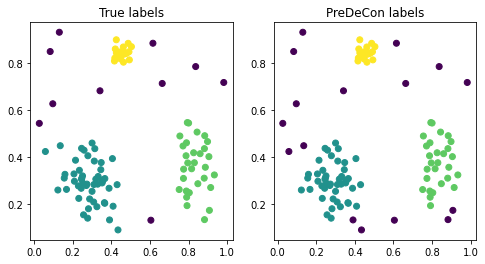

In [3]:
dataset = 'multiple-gaussian-2d'
clustering(dataset, minPts=8, eps=1, delta=0.5, lambda_=2, kappa=100)

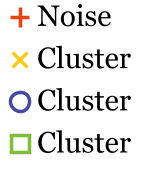

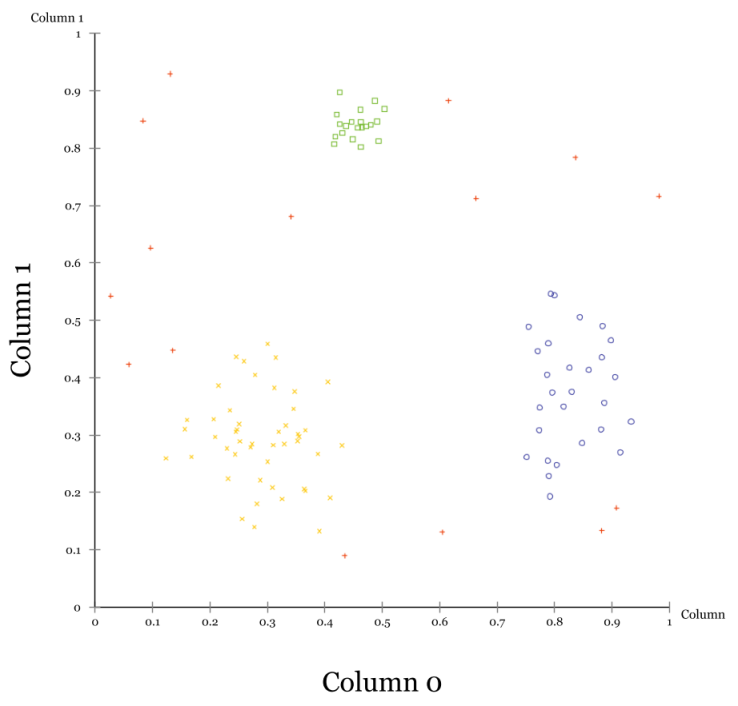

In [4]:
# display results of elki
display(Image(os.path.join(base_path_testing, dataset,'1__eps1__minPts8__delta0_5__kappa100__lambda2__legend.png')))
display(Image(os.path.join(base_path_testing, dataset,'1__eps1__minPts8__delta0_5__kappa100__lambda2.png')))

Clusters found (including noise): 4
Time:   0.0787s
NMI: 0.7461913902298285


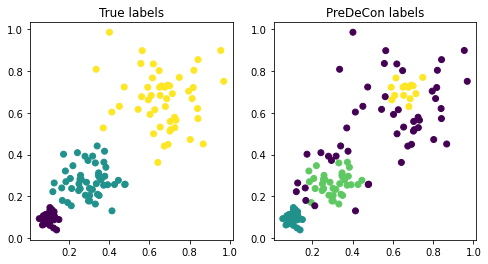

In [5]:
dataset = 'pov'
clustering(dataset, minPts=8, eps=0.7, delta=0.5, lambda_=2, kappa=100)

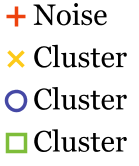

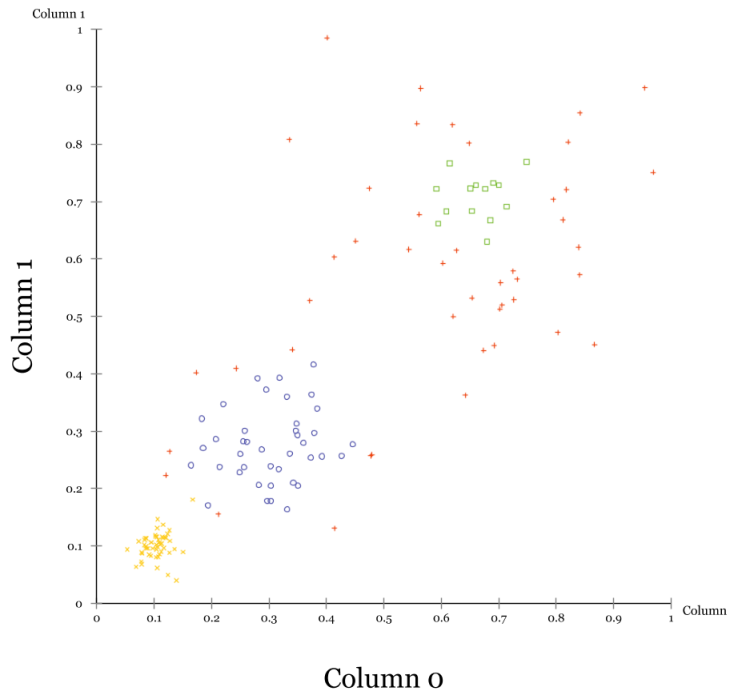

In [6]:
# display results of elki
display(Image(os.path.join(base_path_testing, dataset,'1__eps0_7__minPts8__delta0_5__kappa100__lambda2__legend.png')))
display(Image(os.path.join(base_path_testing, dataset,'1__eps0_7__minPts8__delta0_5__kappa100__lambda2.png')))

Clusters found (including noise): 4
Time:   0.3160s
NMI: 0.6002131734033437


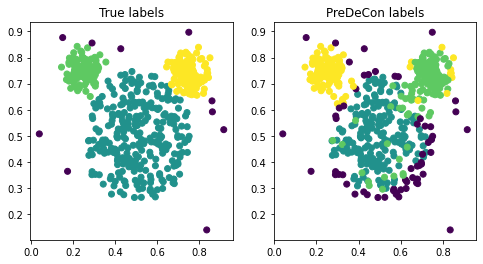

In [7]:
dataset = 'mouse'
clustering(dataset, minPts=25, eps=0.725, delta=0.3, lambda_=2, kappa=100)

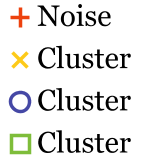

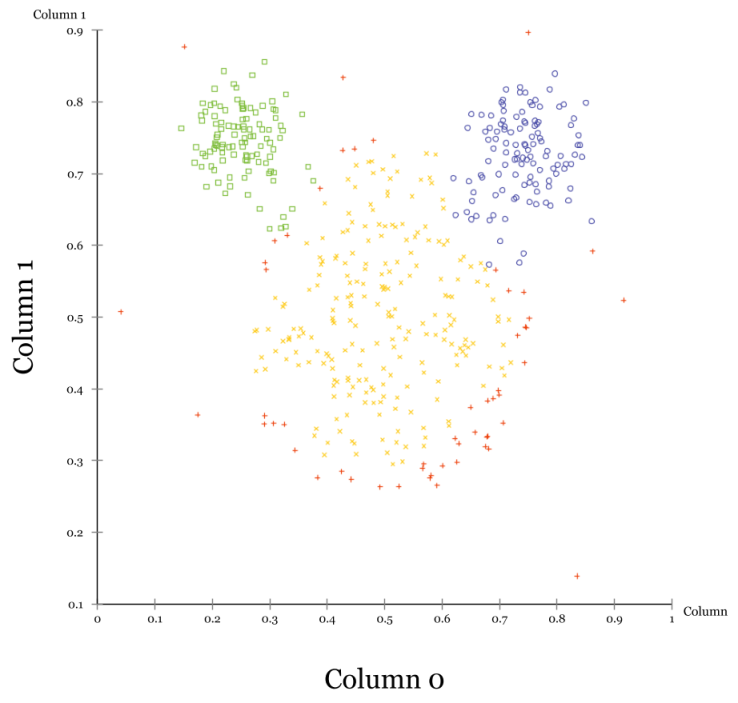

In [8]:
# display results of elki
display(Image(os.path.join(base_path_testing, dataset,'1__eps0_725__minPts25__delta0_3__kappa100__lambda2__legend.png')))
display(Image(os.path.join(base_path_testing, dataset,'1__eps0_725__minPts25__delta0_3__kappa100__lambda2.png')))

Clusters found (including noise): 2
Time:  26.2962s
NMI: 0.8317908713614736


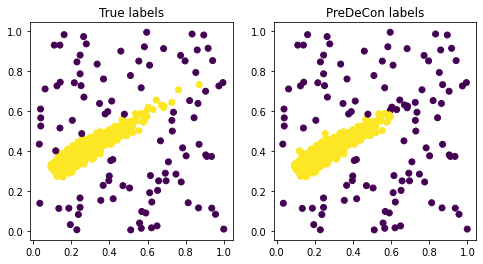

In [9]:
dataset = 'gamma-comet'
clustering(dataset, minPts=25, eps=0.725, delta=0.3, lambda_=2, kappa=100)

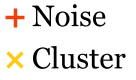

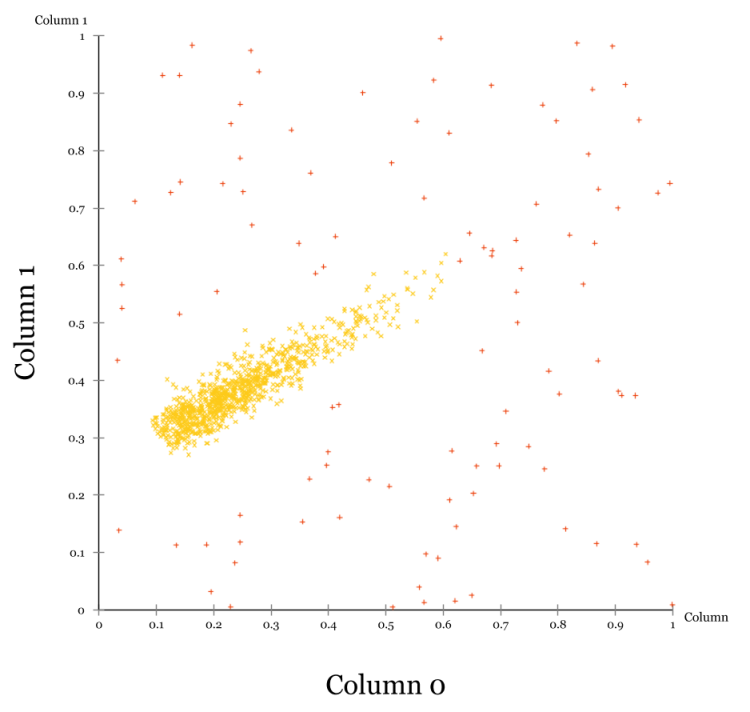

In [10]:
# display results of elki
display(Image(os.path.join(base_path_testing, dataset,'1__eps0_5__minPts10__delta0_3__kappa100__lambda2__legend.png')))
display(Image(os.path.join(base_path_testing, dataset,'1__eps0_5__minPts10__delta0_3__kappa100__lambda2.png')))

#### We also tested our implementation with the example data from exercise sheet 2. While this may not be very representative in itself, we think it might be useful to include it (since everyone has worked with this set in this course).

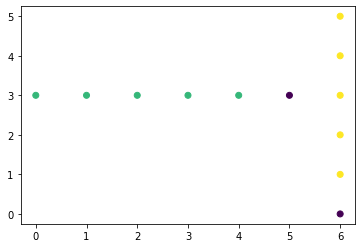

In [11]:
# Exercise 2 Dataset

X = np.array([
    [0, 3],
    [1, 3],
    [2, 3],
    [3, 3],
    [4, 3],
    [5, 3],
    [6, 5],
    [6, 4],
    [6, 3],
    [6, 2],
    [6, 1],
    [6, 0]
])

predecon = PreDeCon()
predecon.fit(X)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=predecon.labels)

In [12]:
print(X, '\n', X.shape, '\n')

p2 = 1
p3 = 2
p6 = 5
p9 = 8

N_p3 = predecon._neighborhoods[p3]
print("p3:   ", X[p3])
print("N(p3):", N_p3)

print("w_p3:", predecon._subspace_preference_matrix[p3])
print("w_p6:", predecon._subspace_preference_matrix[p6])

print("PDim for p3:", predecon._subspace_preference_dimensionality[p3])
print("PDim for p6:", predecon._subspace_preference_dimensionality[p6])

print("dist_pref(p6, p9) =", predecon._similarity[p6, p9])

print("N_w for p3:", predecon._pref_weighted_neighborhoods[p3], sep='\n')
print("N_w for p6:", predecon._pref_weighted_neighborhoods[p6], sep='\n')

print("Is p3 a core point?", predecon._core_points[p3])
print("Is p6 a core point?", predecon._core_points[p6])

print("Is p2 directly preference weighted reachable from p3?", \
    p2 in predecon._directly_reachable_points[p3])
print("Is p6 directly preference weighted reachable from p3?", \
    p6 in predecon._directly_reachable_points[p3], '\n')

print("Cluster labels:", predecon.labels)
print("ID of p3:", predecon.labels[p3])
print("p3 is noise: ", predecon.labels[p3] == predecon._NOISE)
print("ID of p6:", predecon.labels[p6])
print("p6 is noise: ", predecon.labels[p6] == predecon._NOISE)

[[0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 5]
 [6 4]
 [6 3]
 [6 2]
 [6 1]
 [6 0]] 
 (12, 2) 

p3:    [2 3]
N(p3): [1 2 3]
w_p3: [  1. 100.]
w_p6: [  1. 100.]
PDim for p3: 1
PDim for p6: 1
dist_pref(p6, p9) = 10.0
N_w for p3:
[1 2 3]
N_w for p6:
[4 5]
Is p3 a core point? True
Is p6 a core point? False
Is p2 directly preference weighted reachable from p3? True
Is p6 directly preference weighted reachable from p3? False 

Cluster labels: [1, 1, 1, 1, 1, -1, 2, 2, 2, 2, 2, -1]
ID of p3: 1
p3 is noise:  False
ID of p6: -1
p6 is noise:  True
